### Q9

In [1]:
library(MASS)
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


<p>nrows = 506 , ncols=14 </p>
<p>
CRIM - per capita crime rate by town
   </p> <p>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    </p> <p>
INDUS - proportion of non-retail business acres per town.
    </p> <p>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    </p> <p>
NOX - nitric oxides concentration (parts per 10 million)
    </p> <p>
RM - average number of rooms per dwelling
    </p> <p>
AGE - proportion of owner-occupied units built prior to 1940
    </p> <p>
DIS - weighted distances to five Boston employment centres
    </p> <p>
RAD - index of accessibility to radial highways
    </p> <p>
TAX - full-value property-tax rate per 10,000
    </p> <p>

PTRATIO - pupil-teacher ratio by town
    </p> <p>
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    </p> <p>
LSTAT - percentage lower status of the population
    </p> <p>
MEDV - Median value of owner-occupied homes in 1000's
    </p> <p>
</p>
<p><a href='https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html#:~:text=The%20Boston%20Housing%20Dataset,the%20area%20of%20Boston%20Mass.&text=It%20was%20obtained%20from%20the,the%20literature%20to%20benchmark%20algorithms.'>source </a></p> 

In [2]:
#part a
lr_model_cube <- lm(nox ~ poly(dis, d=3), data=Boston)
summary(lr_model_cube)


Call:
lm(formula = nox ~ poly(dis, d = 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, d = 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, d = 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, d = 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


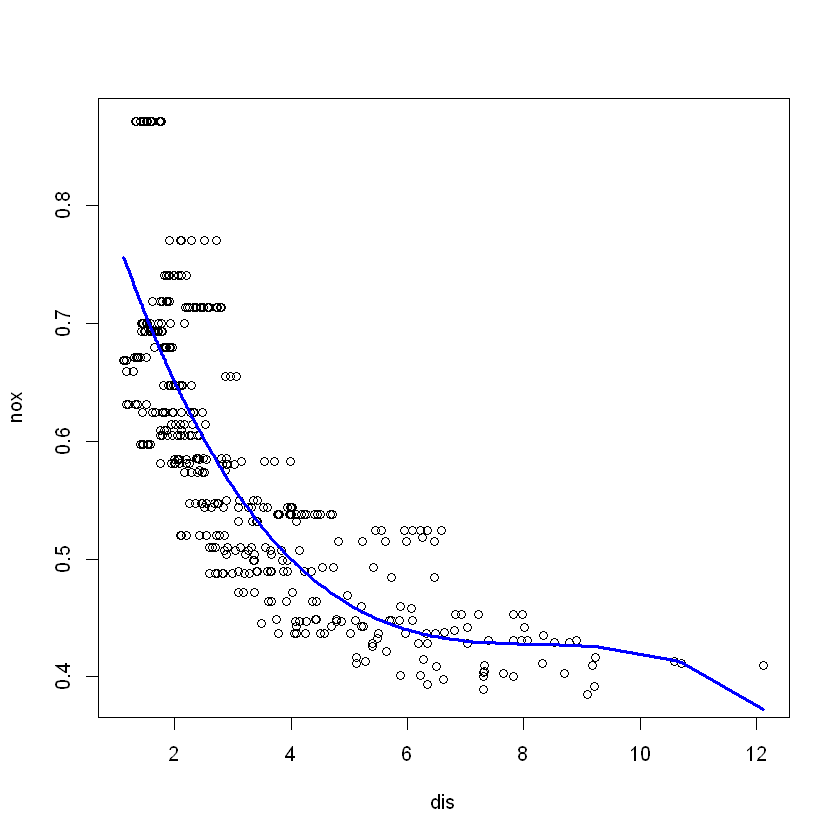

In [9]:
plot(Boston$nox ~ Boston$dis, xlab='dis', ylab='nox')
lines(sort(Boston$dis), fitted(lr_model_cube)[order(Boston$dis)], col='blue', type='l',lw=3) 

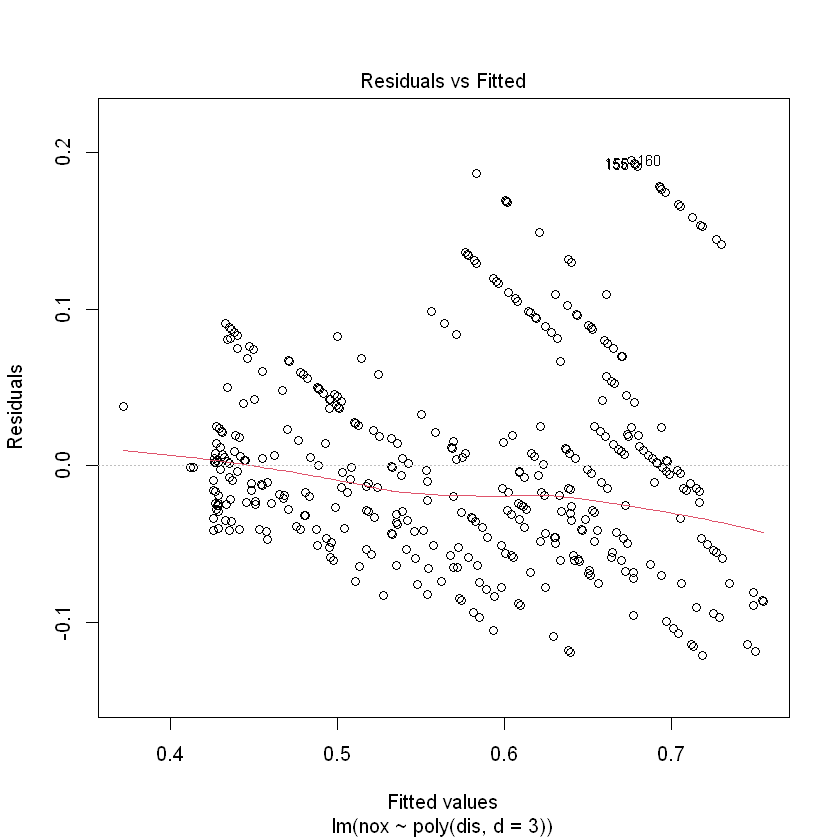

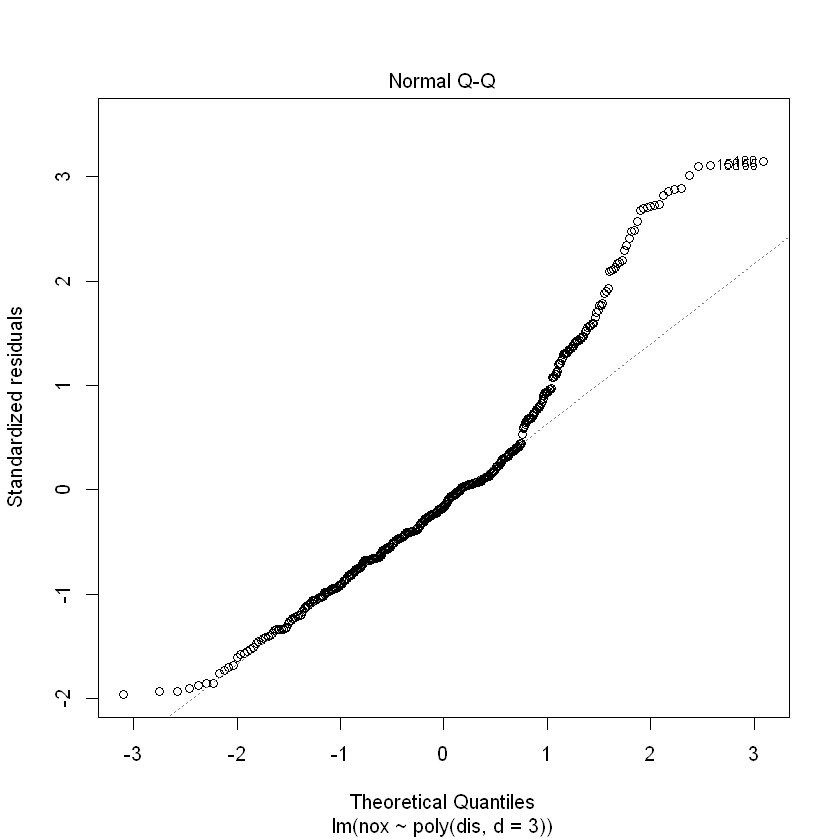

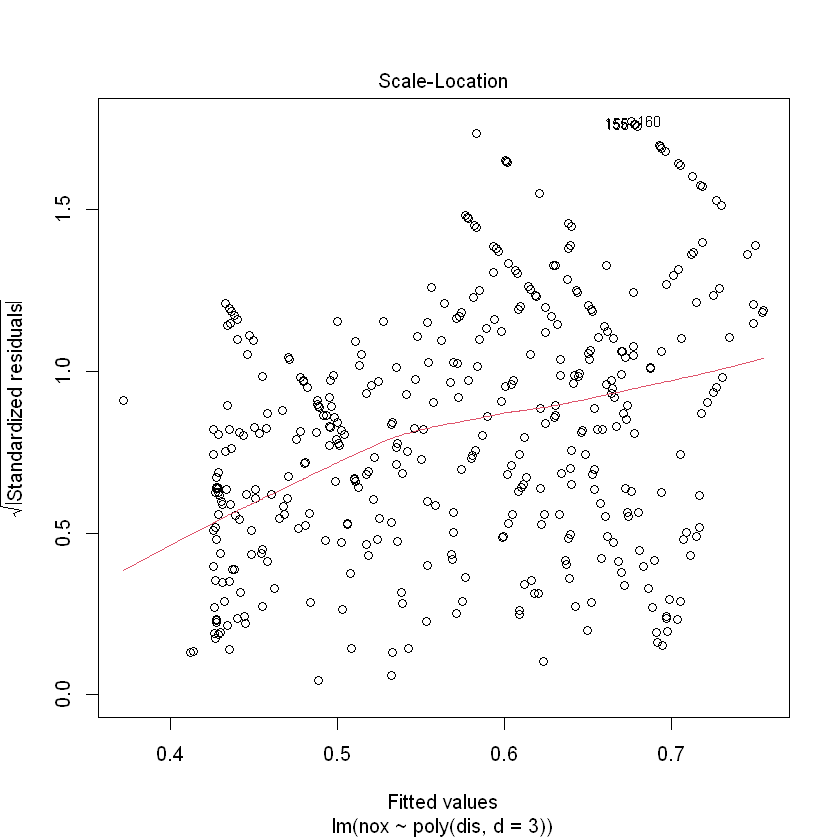

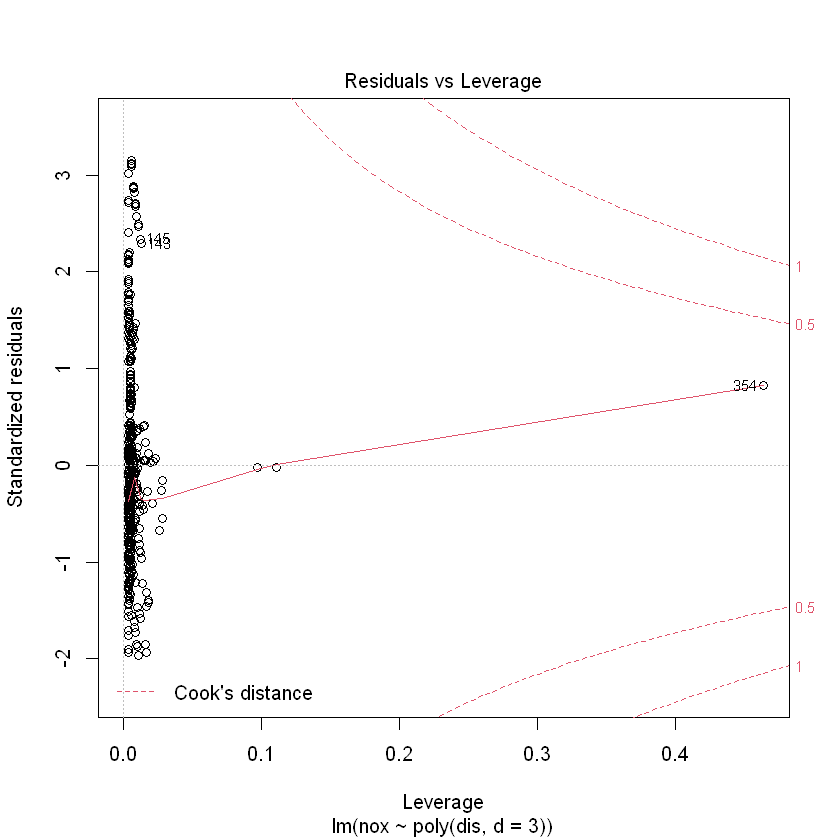

In [10]:
plot(lr_model_cube)

In [33]:
#part b

rss_results <- NULL
for (d in 1:10) {
    LR_for <- lm(nox ~ poly(dis, d=d), data=Boston)
    rss <- sum((predict(LR_for, newdata=Boston) - Boston$nox)^2)
    rss_results$degrees[d] <-  d
    rss_results$RSSs[d] <-  rss
}

rss_results <- data.frame(rss_results)
rss_results

degrees,RSSs
<int>,<dbl>
1,2.768563
2,2.035262
3,1.934107
4,1.932981
5,1.915290
6,1.878257
7,1.849484
8,1.835630
9,1.833331


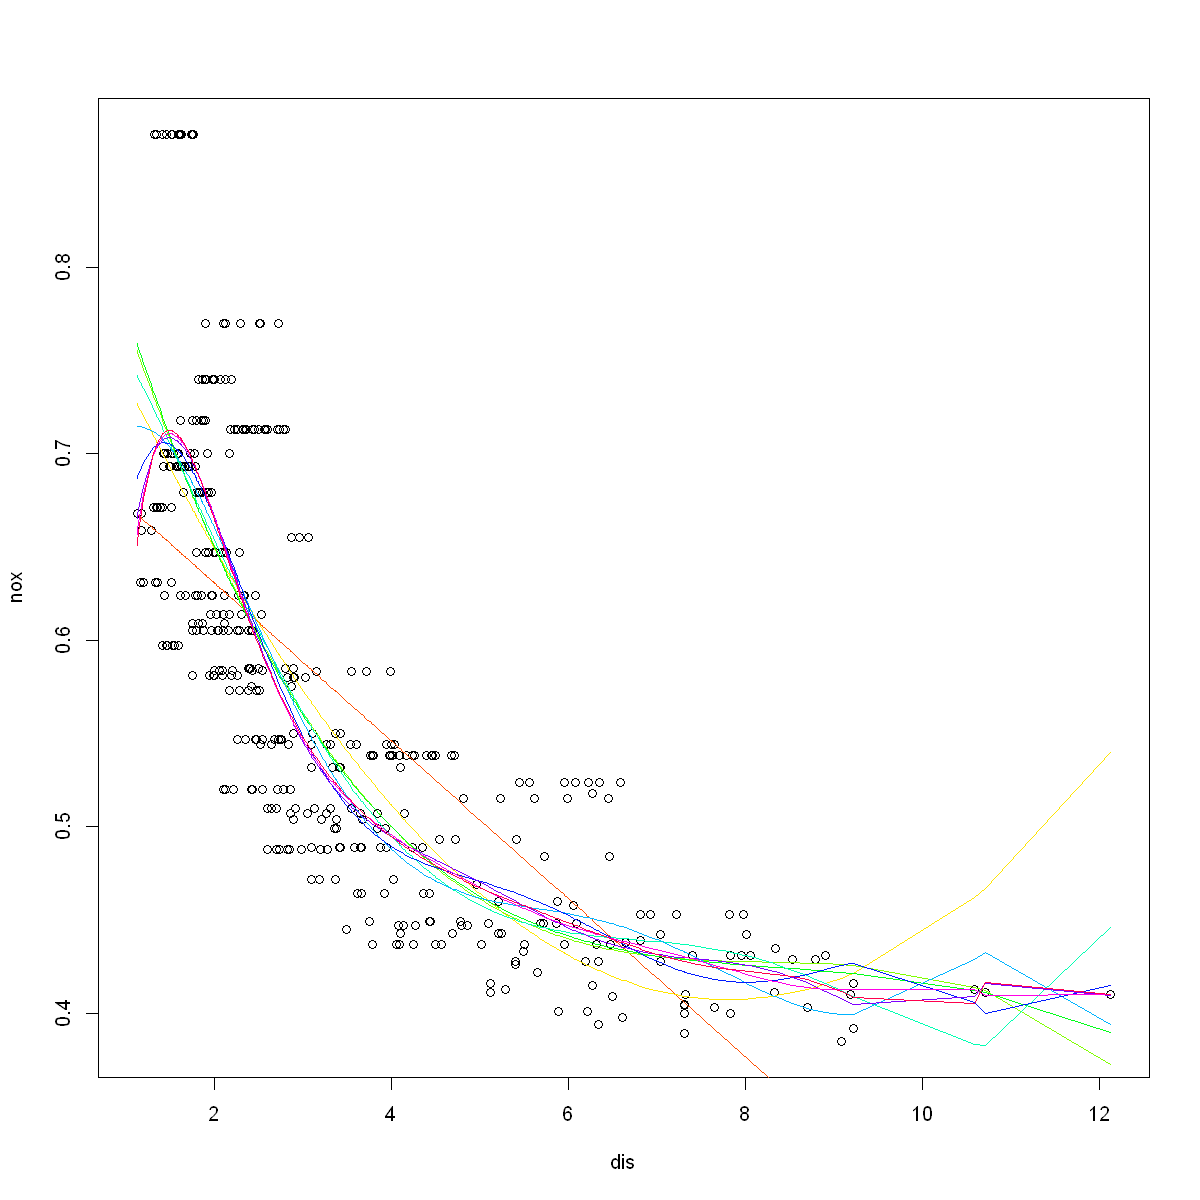

In [41]:

plot(Boston$nox ~ Boston$dis, xlab='dis', ylab='nox')
for (d in 1:10) {
    LR_for <- lm(nox ~ poly(dis, d=d), data=Boston)    
    lines(sort(Boston$dis), fitted(LR_for)[order(Boston$dis)],
          col=rainbow(20)[d+d], type='l') 
}

In [46]:
#part c
library(lmvar)
cross_validation <- NULL

for (d in 1:10) {
    LR_for <- lm(nox ~ poly(dis, d=d), data=Boston, x=TRUE, y=TRUE)
    CV_for <- cv.lm(LR_for, k=5, seed=123)
    cross_validation$Degrees[d] <- d
    cross_validation$MSE[d] <- CV_for$MSE$mean
    
}

cross_validation <- data.frame(cross_validation)
cross_validation

Degrees,MSE
<int>,<dbl>
1,0.005500581
2,0.004045020
3,0.003848125
4,0.003873872
5,0.004220464
6,0.005086963
7,0.010315732
8,0.003935421
9,0.004147233


In [47]:
cross_validation[cross_validation$MSE == min(cross_validation$MSE), ]

,Degrees,MSE
,<int>,<dbl>
3,3,0.003848125



Call:
lm(formula = nox ~ bs(dis, df = 4), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124622 -0.039259 -0.008514  0.020850  0.193891 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.73447    0.01460  50.306  < 2e-16 ***
bs(dis, df = 4)1 -0.05810    0.02186  -2.658  0.00812 ** 
bs(dis, df = 4)2 -0.46356    0.02366 -19.596  < 2e-16 ***
bs(dis, df = 4)3 -0.19979    0.04311  -4.634 4.58e-06 ***
bs(dis, df = 4)4 -0.38881    0.04551  -8.544  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06195 on 501 degrees of freedom
Multiple R-squared:  0.7164,	Adjusted R-squared:  0.7142 
F-statistic: 316.5 on 4 and 501 DF,  p-value: < 2.2e-16


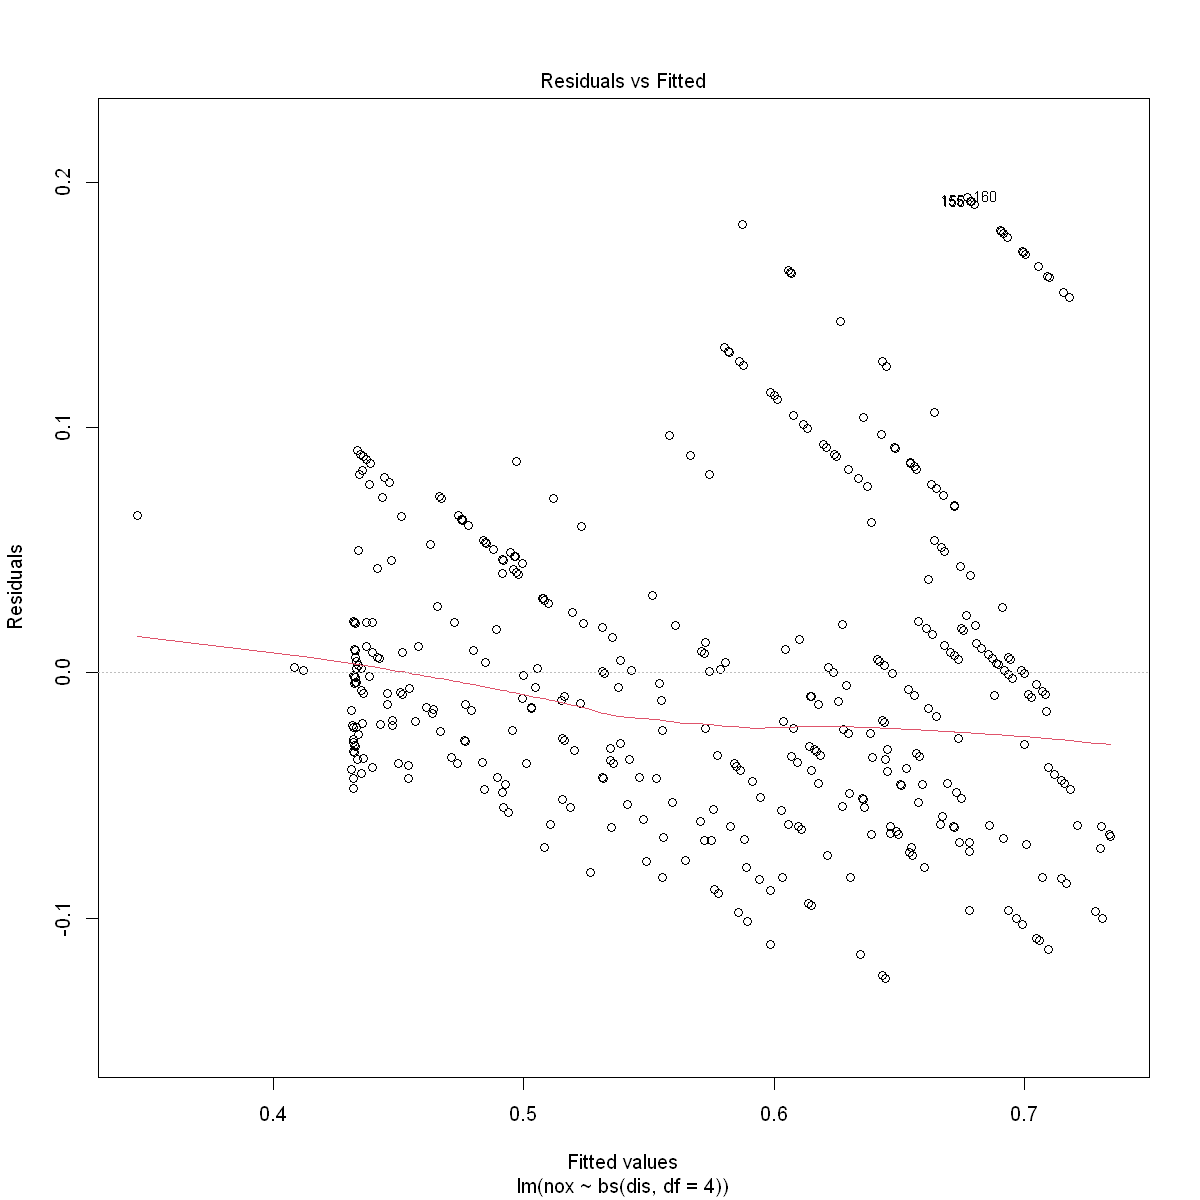

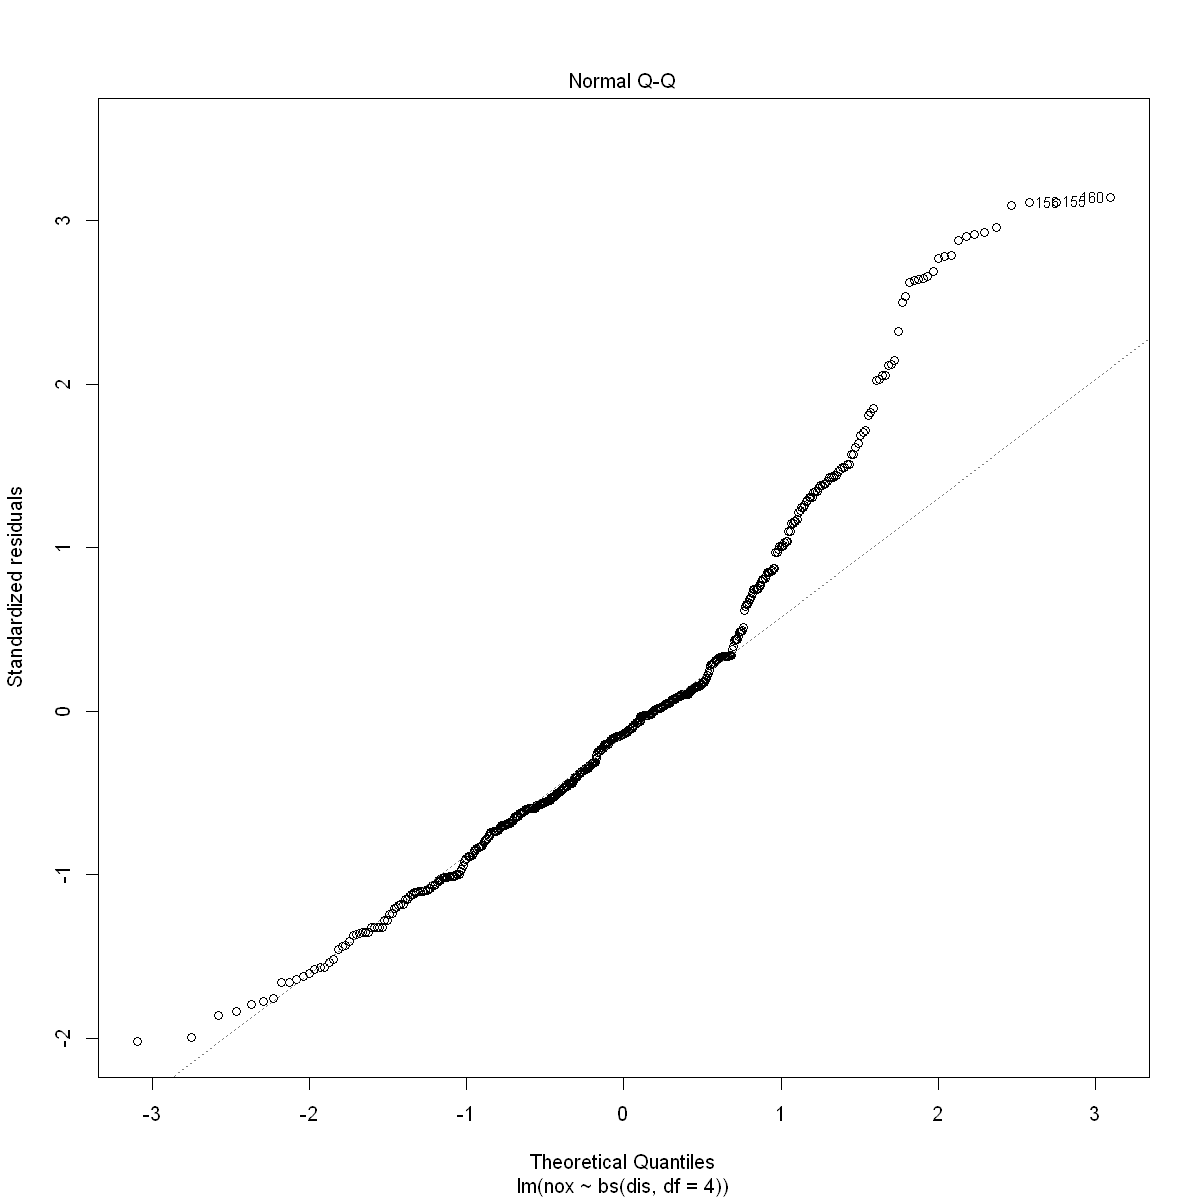

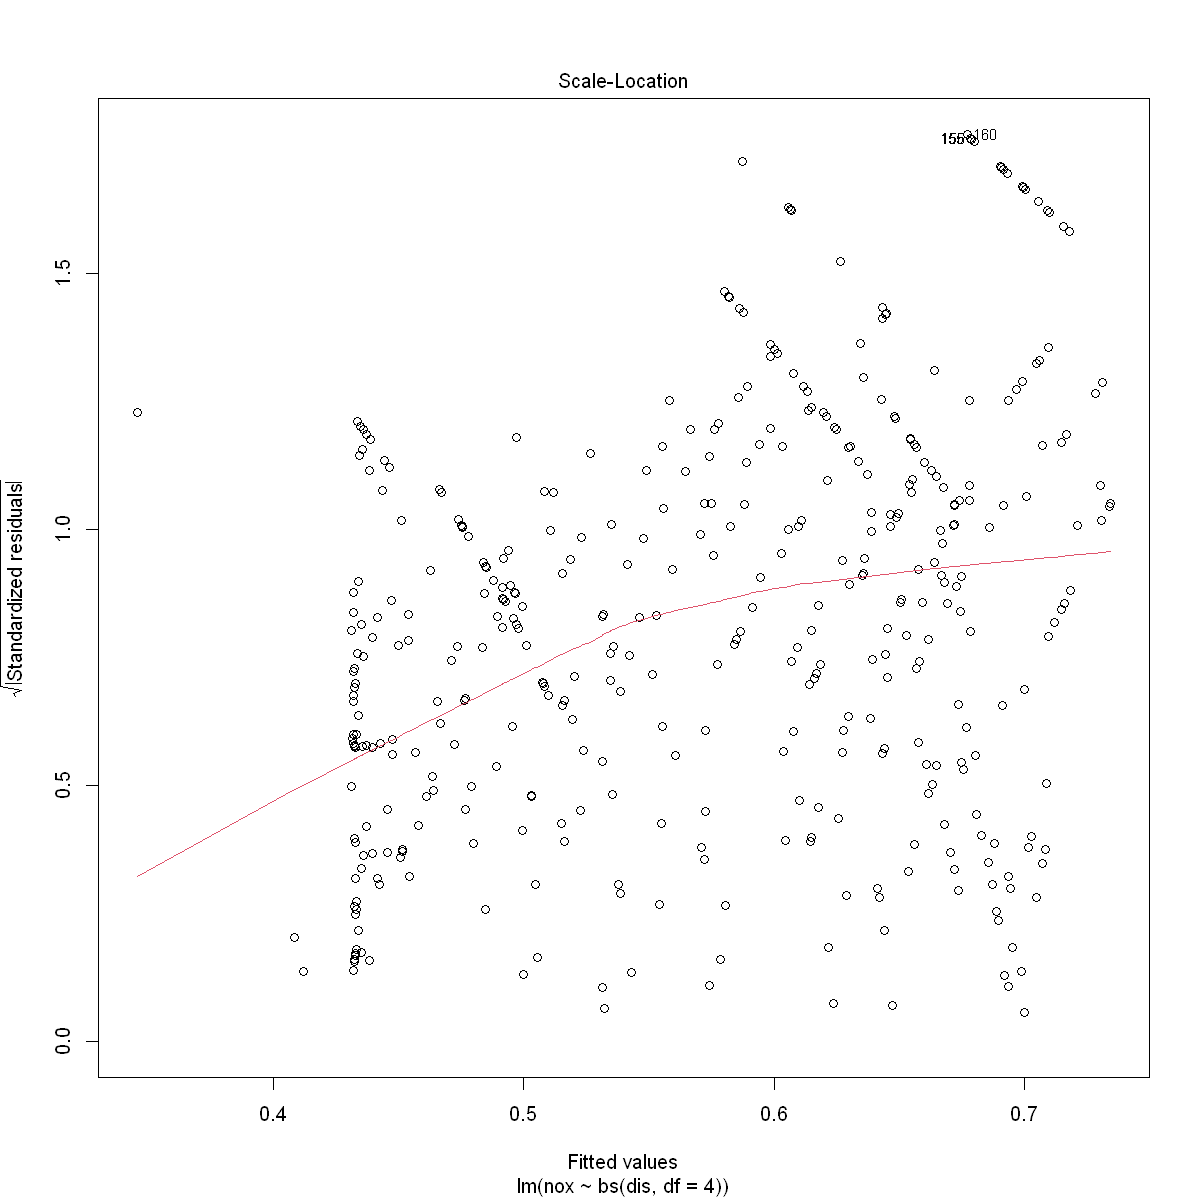

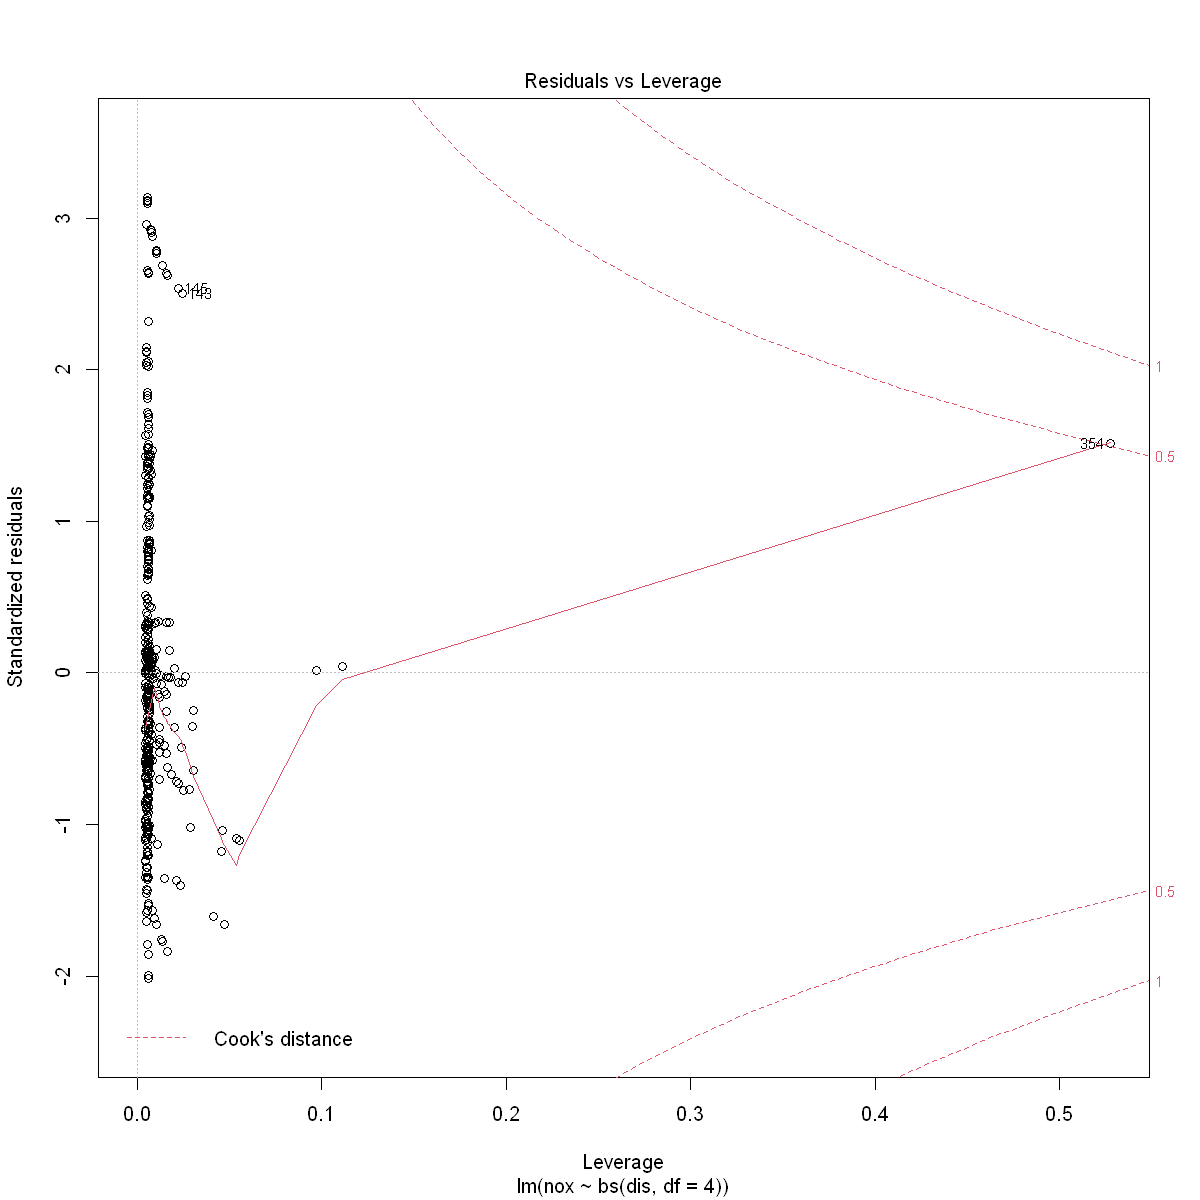

In [50]:
#part d
library(splines)
LR_splines <- lm(nox ~ bs(dis, df=4), data=Boston)
summary(LR_splines)
plot(LR_splines)

In [51]:
Spline_df <- NULL
for (d in 1:20) {
    spline_for <- lm(nox ~ bs(dis, df=d), data=Boston)
    RSS <- sum((predict(spline_for, newdata=Boston) - Boston$nox)^2)
    Spline_df$Dgrees[d]<-d
    Spline_df$RSS[d] <- RSS
    
}

Spline_df <- data.frame(Spline_df)
Spline_df

Warning message in bs(dis, df = d):
"'df' was too small; have used 3"
Warning message in bs(dis, df = d):
"'df' was too small; have used 3"


Dgrees,RSS
<int>,<dbl>
1,1.934107
2,1.934107
3,1.934107
4,1.922775
5,1.840173
6,1.833966
7,1.829884
8,1.816995
9,1.825653


In [58]:
#part f

cross_validation_splines <- NULL

for (d in 1:20) {
    spline_for <- lm(nox ~ bs(dis, df=d), data=Boston, x=TRUE, y=TRUE)
    CV_for <- cv.lm(spline_for, k=5, seed=123)
    cross_validation_splines$Degrees[d] <- d
    cross_validation_splines$MSE[d] <- CV_for$MSE$mean
    
}

cross_validation_splines <- data.frame(cross_validation_splines)
cross_validation_splines

Warning message in bs(dis, df = d):
"'df' was too small; have used 3"
Warning message in bs(dis, df = d):
"'df' was too small; have used 3"


Degrees,MSE
<int>,<dbl>
1,0.003861502
2,0.003861502
3,0.003861502
4,0.003867090
5,0.003698980
6,0.003703753
7,0.003703729
8,0.003697953
9,0.003735732


In [59]:

cross_validation_splines[cross_validation_splines$MSE == min(cross_validation_splines$MSE), ]

,Degrees,MSE
,<int>,<dbl>
10,10,0.003672526


### Q10

In [57]:
library(ISLR)
str(College)

'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

<p>Private
A factor with levels No and Yes indicating private or public university
</p>
<p>
Apps
Number of applications received
</p>
<p>
Accept
Number of applications accepted
</p>
<p>
Enroll
Number of new students enrolled
</p>
<p>
Top10perc
Pct. new students from top 10% of H.S. class
</p>
<p>
Top25perc
Pct. new students from top 25% of H.S. class
</p>
<p>
F.Undergrad
Number of fulltime undergraduates
</p>
<p>
P.Undergrad
Number of parttime undergraduates
</p>
<p>
Outstate
Out-of-state tuition
</p>
<p>
Room.Board
Room and board costs
</p>
<p>
Books
Estimated book costs
</p>
<p>
Personal
Estimated personal spending
</p>
<p>
PhD
Pct. of faculty with Ph.D.'s
</p>
<p>
Terminal
Pct. of faculty with terminal degree
</p>
<p>
S.F.Ratio
Student/faculty ratio
</p>
<p>
perc.alumni
Pct. alumni who donate
</p>
<p>
Expend
Instructional expenditure per student
</p>
<p>
Grad.Rate
Graduation rate</p>


In [91]:
collage<-College
collage$Private <- as.numeric(collage$Private=='Yes')
set.seed(123)
#seting the row indexes
index <- sample(1:nrow(collage), round(0.5 * nrow(collage), 0))
#spliting data based on the index
train <- collage[index, ]
test <- collage[-index, ]

In [93]:
str(train)

'data.frame':	388 obs. of  18 variables:
 $ Private    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Apps       : num  1127 516 379 1016 560 ...
 $ Accept     : num  884 392 341 872 454 ...
 $ Enroll     : num  308 154 265 300 113 557 622 282 328 385 ...
 $ Top10perc  : num  30 32 10 27 36 35 20 25 34 44 ...
 $ Top25perc  : num  64 62 36 57 56 68 56 54 73 73 ...
 $ F.Undergrad: num  1310 630 1050 1116 484 ...
 $ P.Undergrad: num  766 549 151 602 16 ...
 $ Outstate   : num  11718 11020 4950 11250 10955 ...
 $ Room.Board : num  7398 4970 2780 4980 3450 ...
 $ Books      : num  450 610 530 550 330 700 450 400 450 400 ...
 $ Personal   : num  1800 1900 1500 1400 670 1300 3160 1200 550 400 ...
 $ PhD        : num  73 73 62 66 62 95 90 73 89 79 ...
 $ Terminal   : num  87 75 62 73 87 95 90 82 93 87 ...
 $ S.F.Ratio  : num  16.4 14 15.7 15.8 10.6 15.8 15.1 14.2 13 15.3 ...
 $ perc.alumni: num  33 36 7 36 31 32 9 32 33 32 ...
 $ Expend     : num  8871 9315 5619 7411 9552 ...
 $ Grad.Rate  : num  76 58 38 

In [92]:
library(dplyr)
selected_columns=colnames(train%>%select(-Outstate))
length(selected_columns)

[1] 17

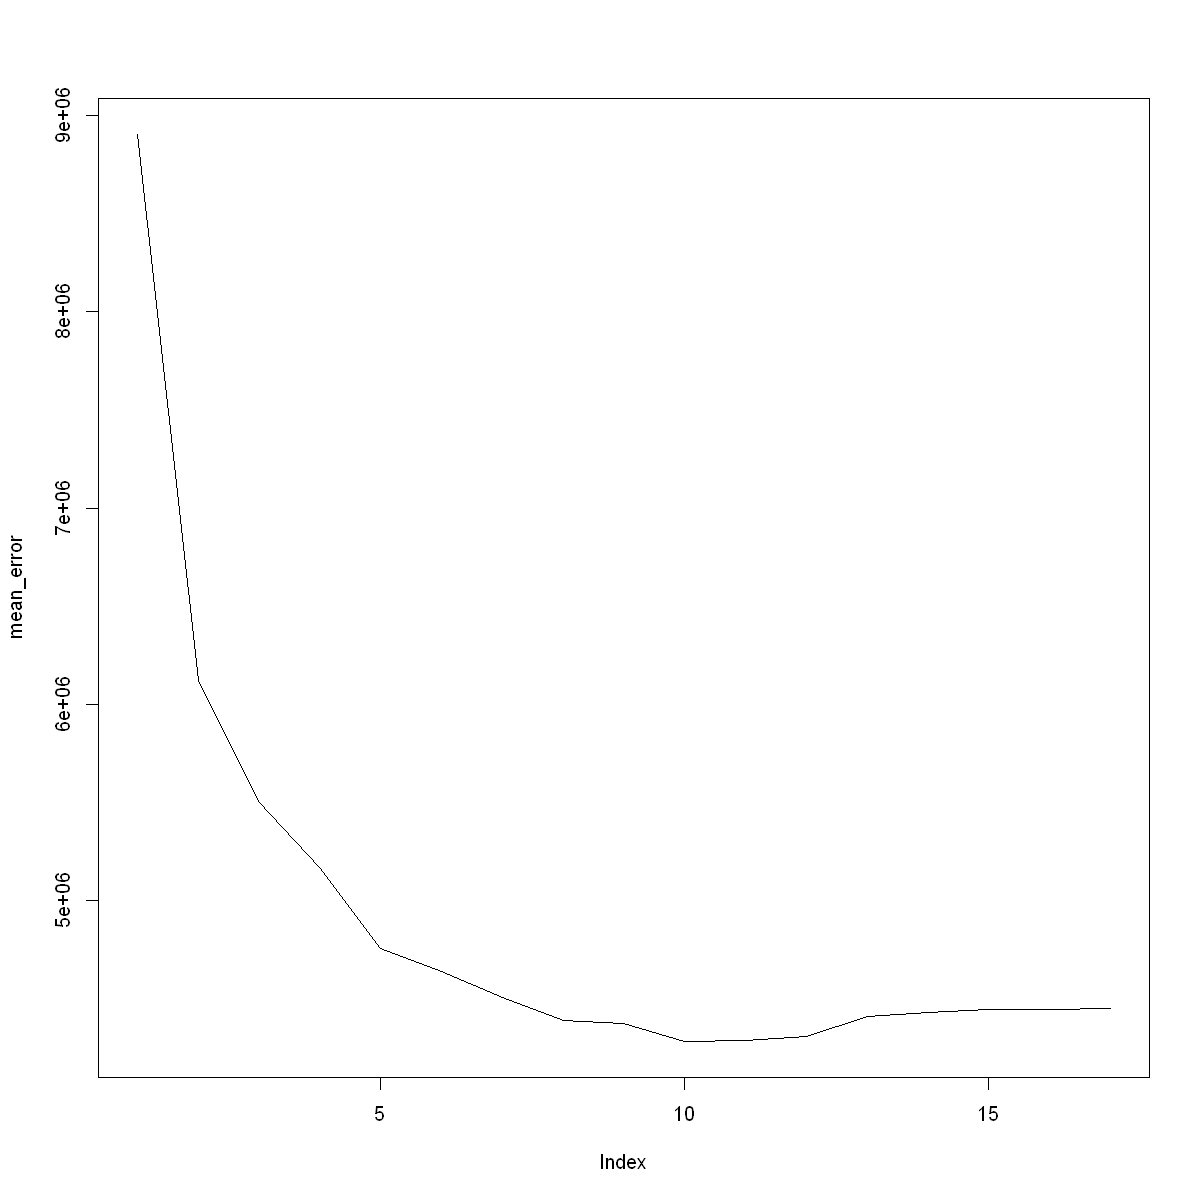

In [70]:
#forward selection
library(leaps)
set.seed(123)


folds <- sample(1:5, nrow(train), replace=TRUE)
cv_mat <- matrix(NA, k, nvar, dimnames=list(NULL, paste(1:nvar)))

for (j in 1:5) {
    LR_for <- regsubsets(Outstate ∼ ., data=train[folds != j, ], nvmax=17, method='forward')
    for(i in 1:nvar) {
        prediction <- predict(LR_for, train[folds == j, ], id=i)
        cv_mat[j, i] <- mean((train$Outstate[folds == j] - prediction)^2)
    }
}
mean_error <- apply(cv_mat, 2, mean)
plot(mean_error, type='l')

In [72]:
which.min(mean_error)
min(mean_error)

10 
10

[1] 4285485

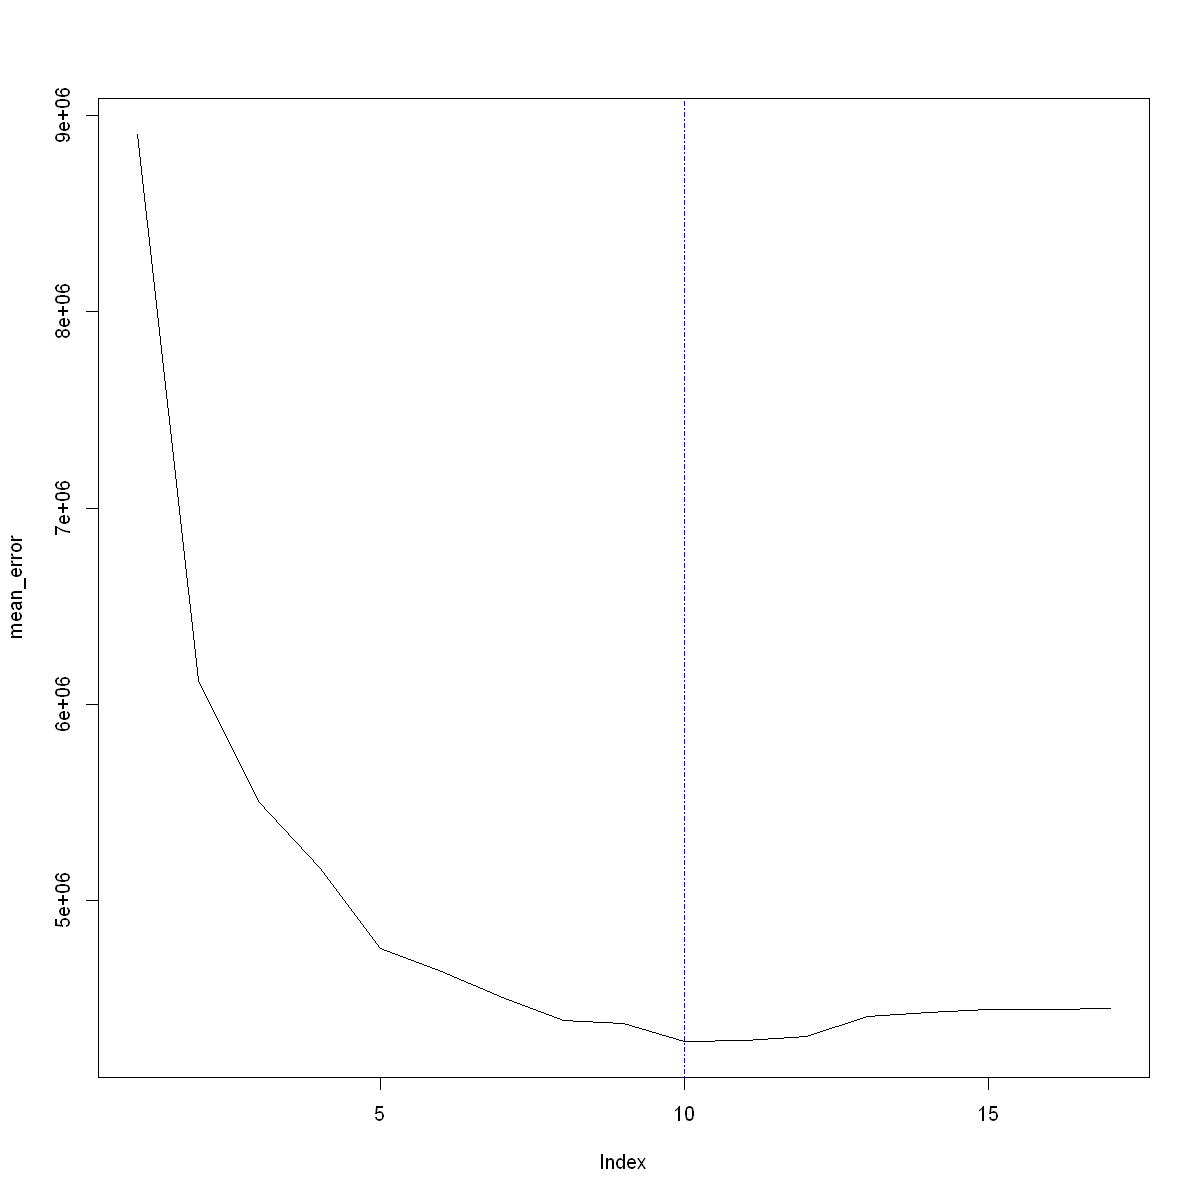

In [73]:
plot(mean_error, type='l')
abline(v=10, col='blue', lty=4)

In [75]:
LR_forward <- regsubsets(Outstate ~ ., data=train, nvmax=17, method='forward')
coef_LR_forward<-coef(LR_forward, 10)
coef_LR_forward<-data.frame(coef_LR_forward)
coef_LR_forward

,coef_LR_forward
,<dbl>
(Intercept),-2155.8778329
Private,3061.1503498
Accept,0.5724405
Enroll,-1.3130825
Top25perc,16.1356242
Room.Board,0.5417038
Personal,-0.3678476
Terminal,37.4214386
perc.alumni,42.5761978


In [84]:
forward_selection<-rownames(coef_LR_forward)
forward_selection<-forward_selection[2:length(forward_selection)]

In [85]:
forward_selection

[1] "Private"     "Accept"      "Enroll"      "Top25perc"   "Room.Board" 
 [6] "Personal"    "Terminal"    "perc.alumni" "Expend"      "Grad.Rate"

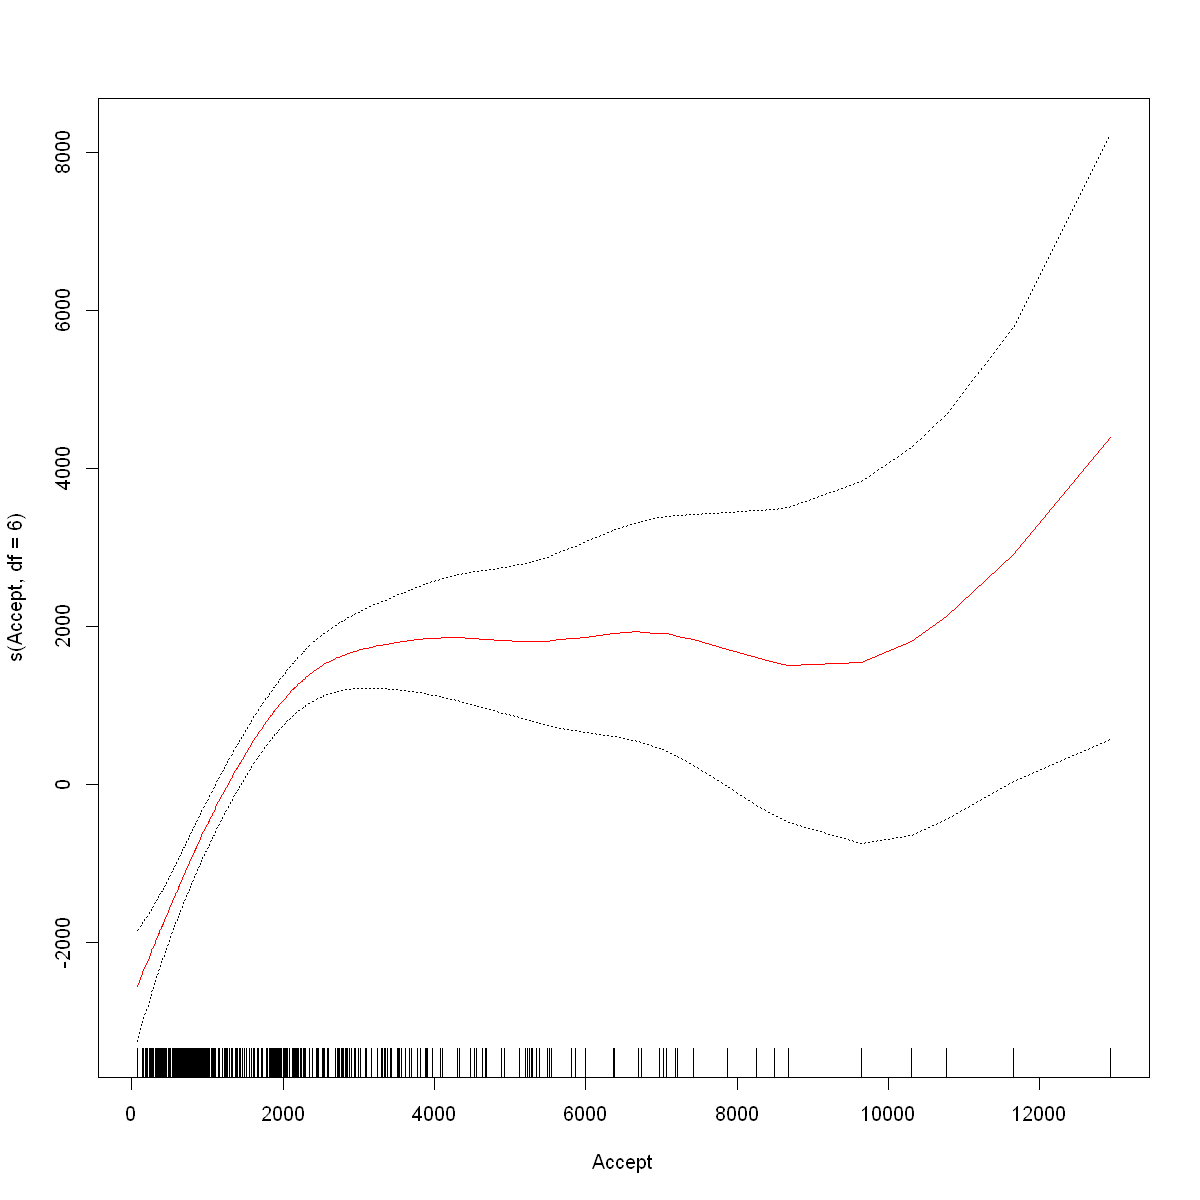

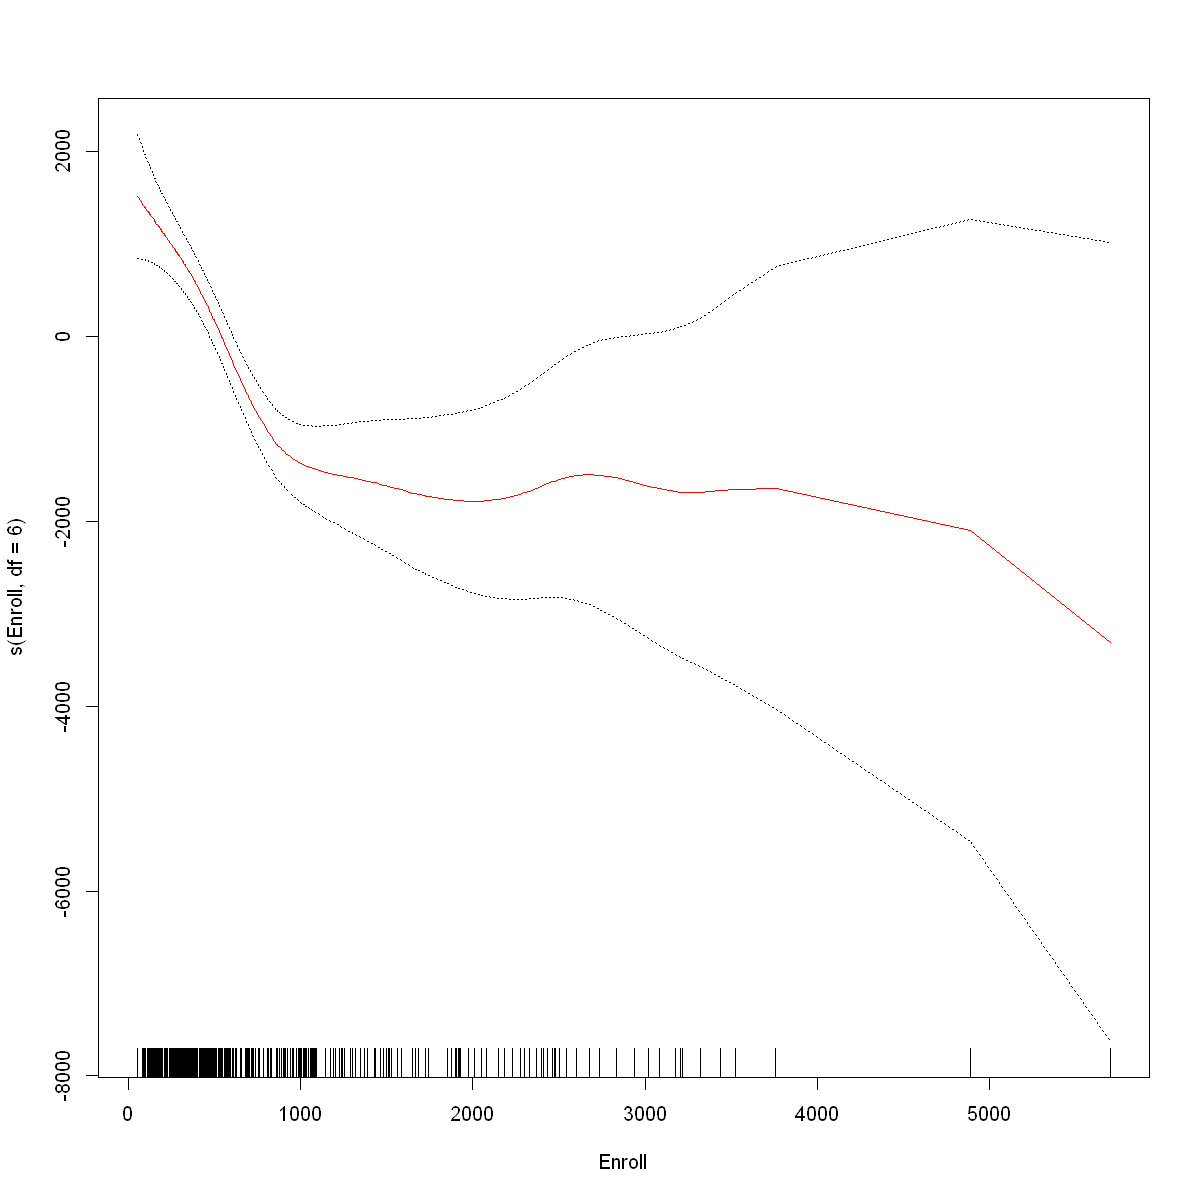

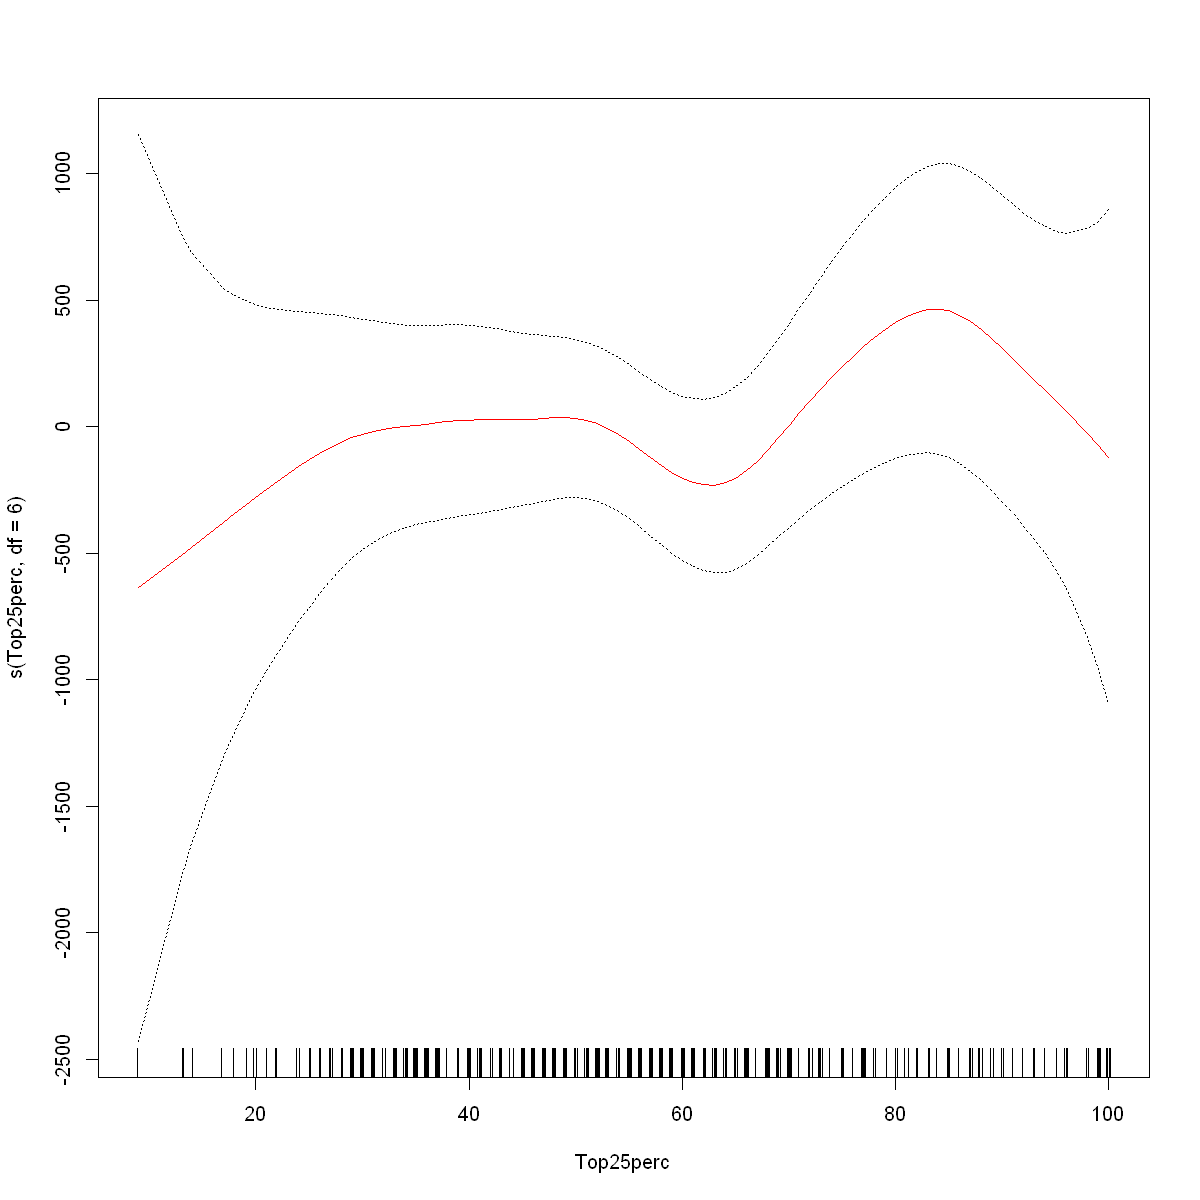

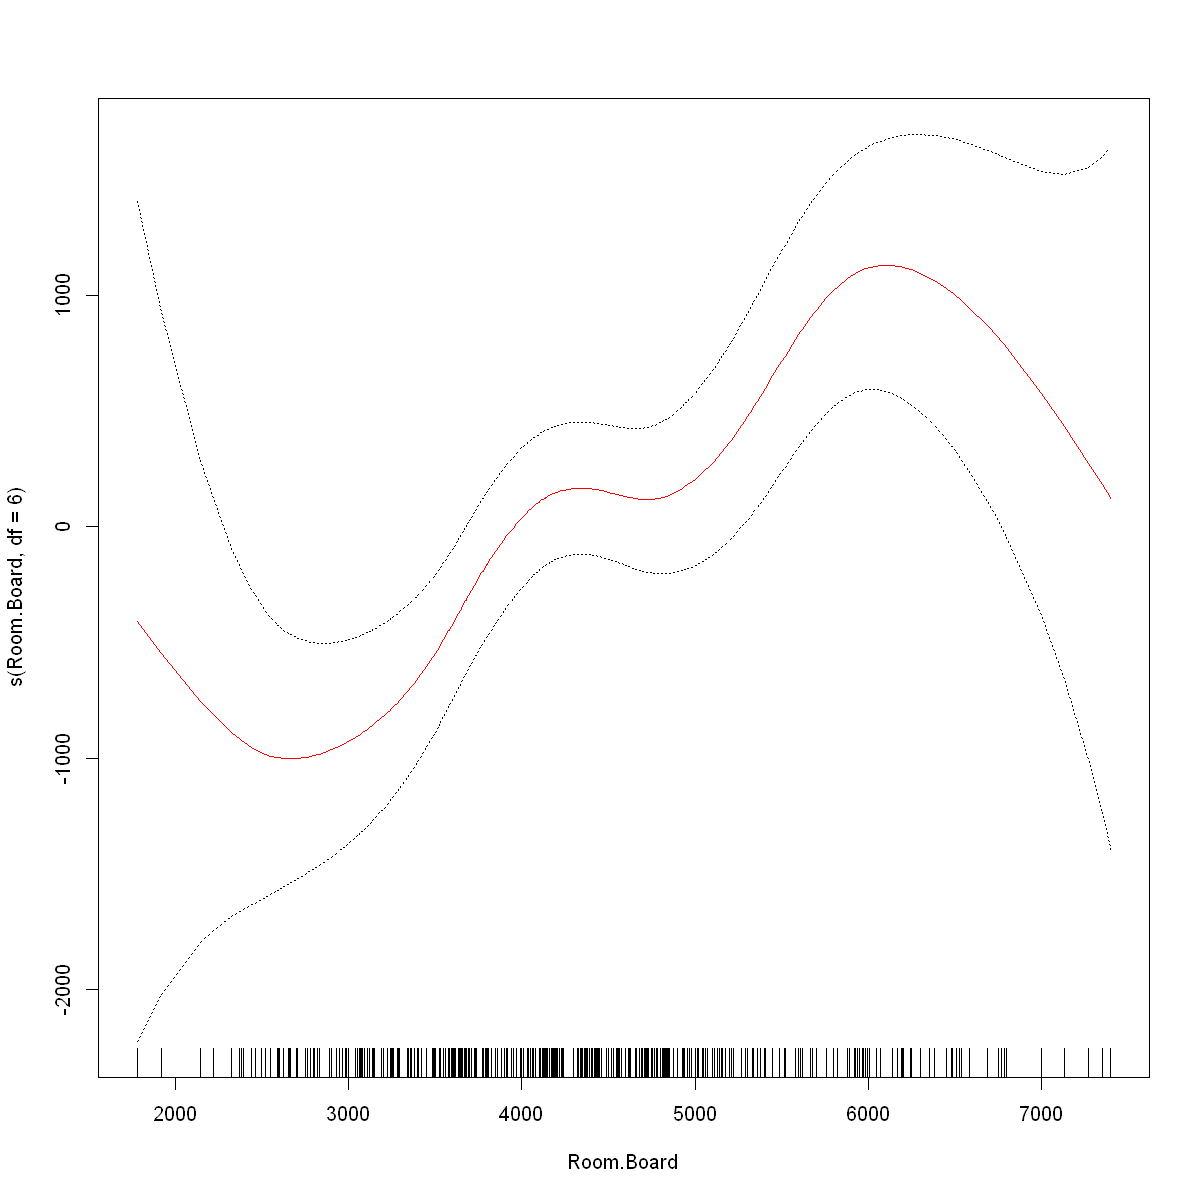

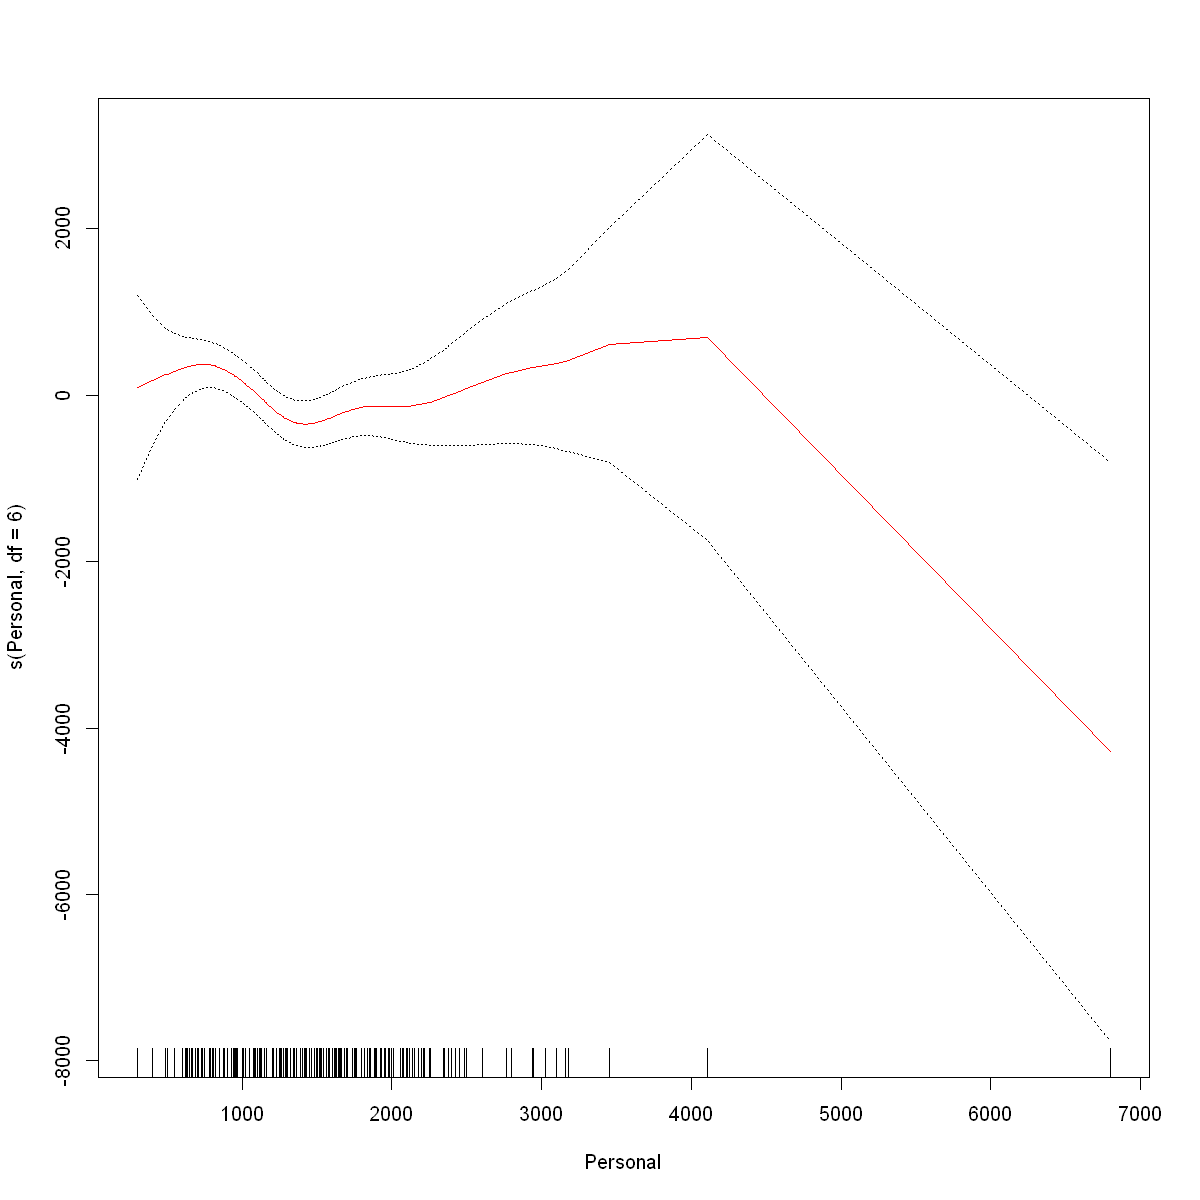

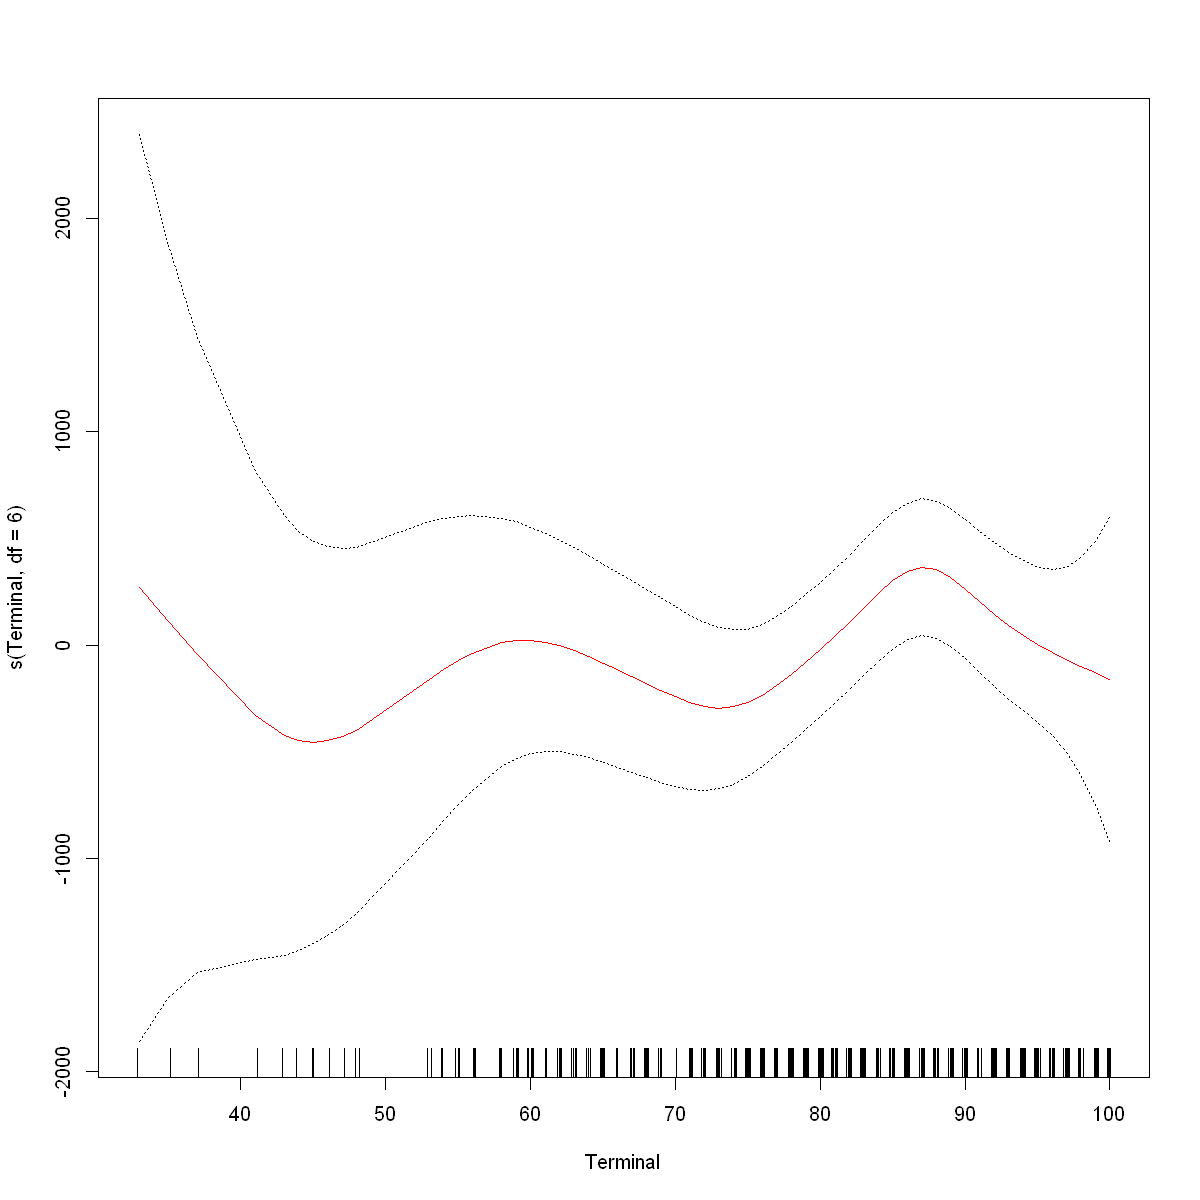

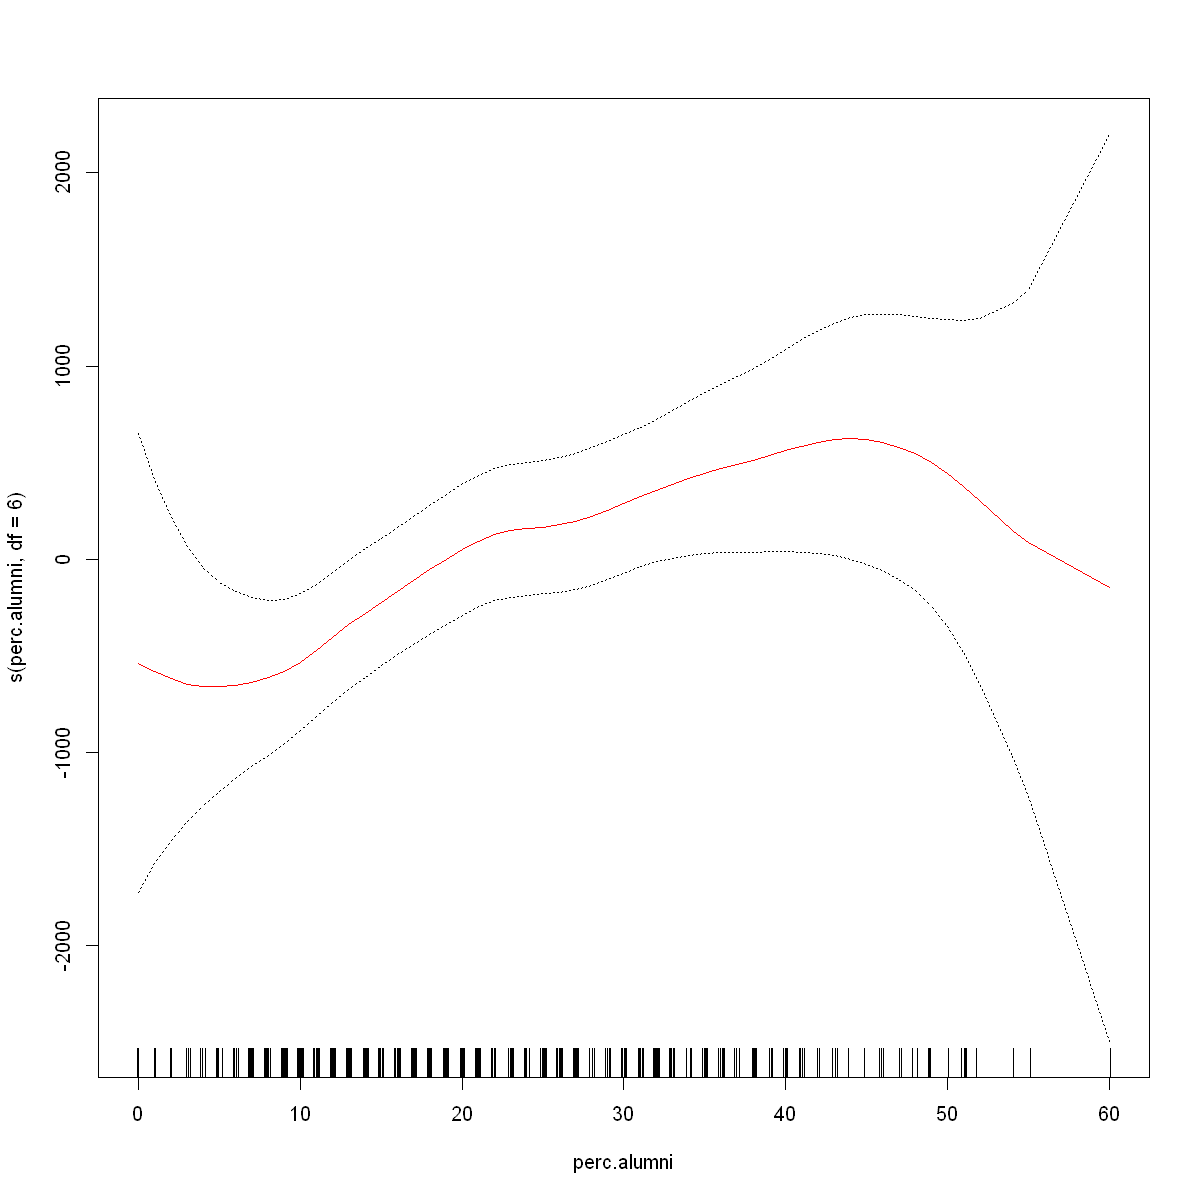

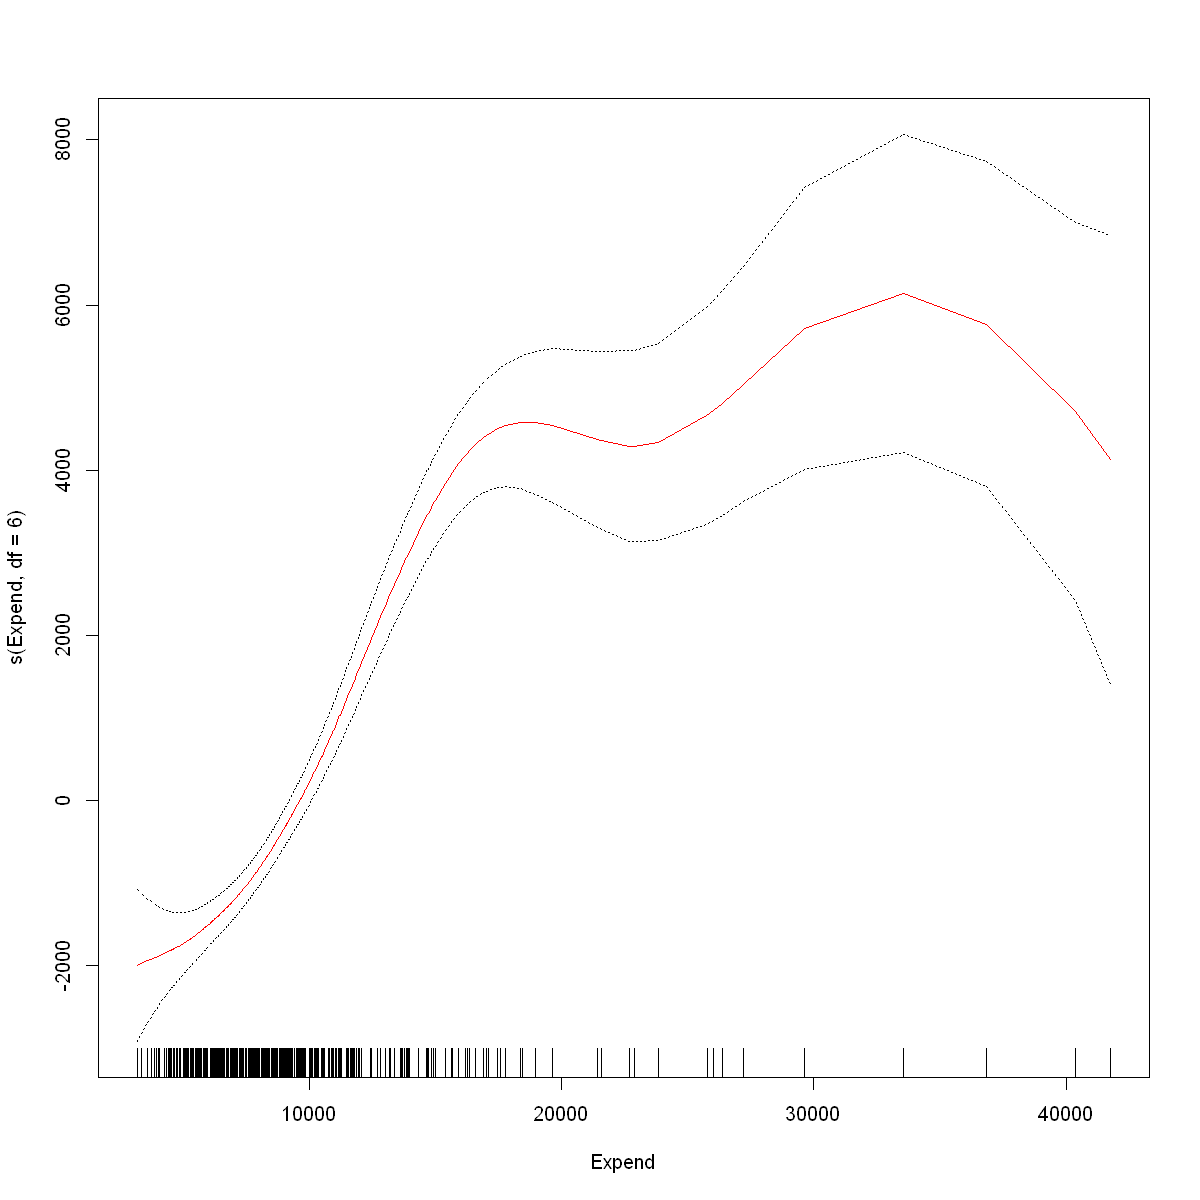

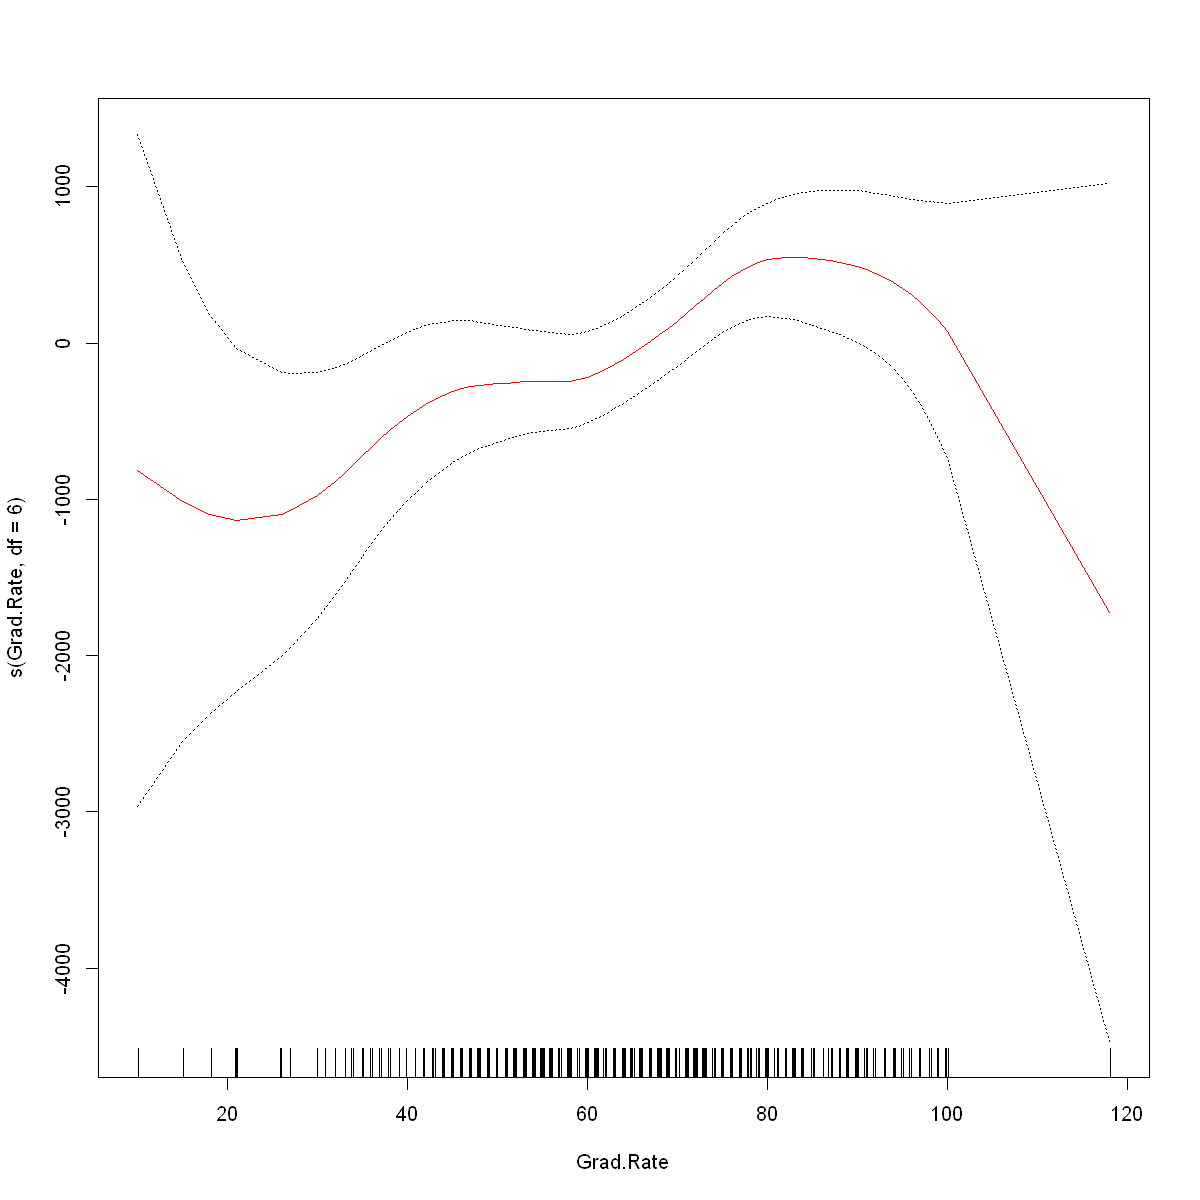

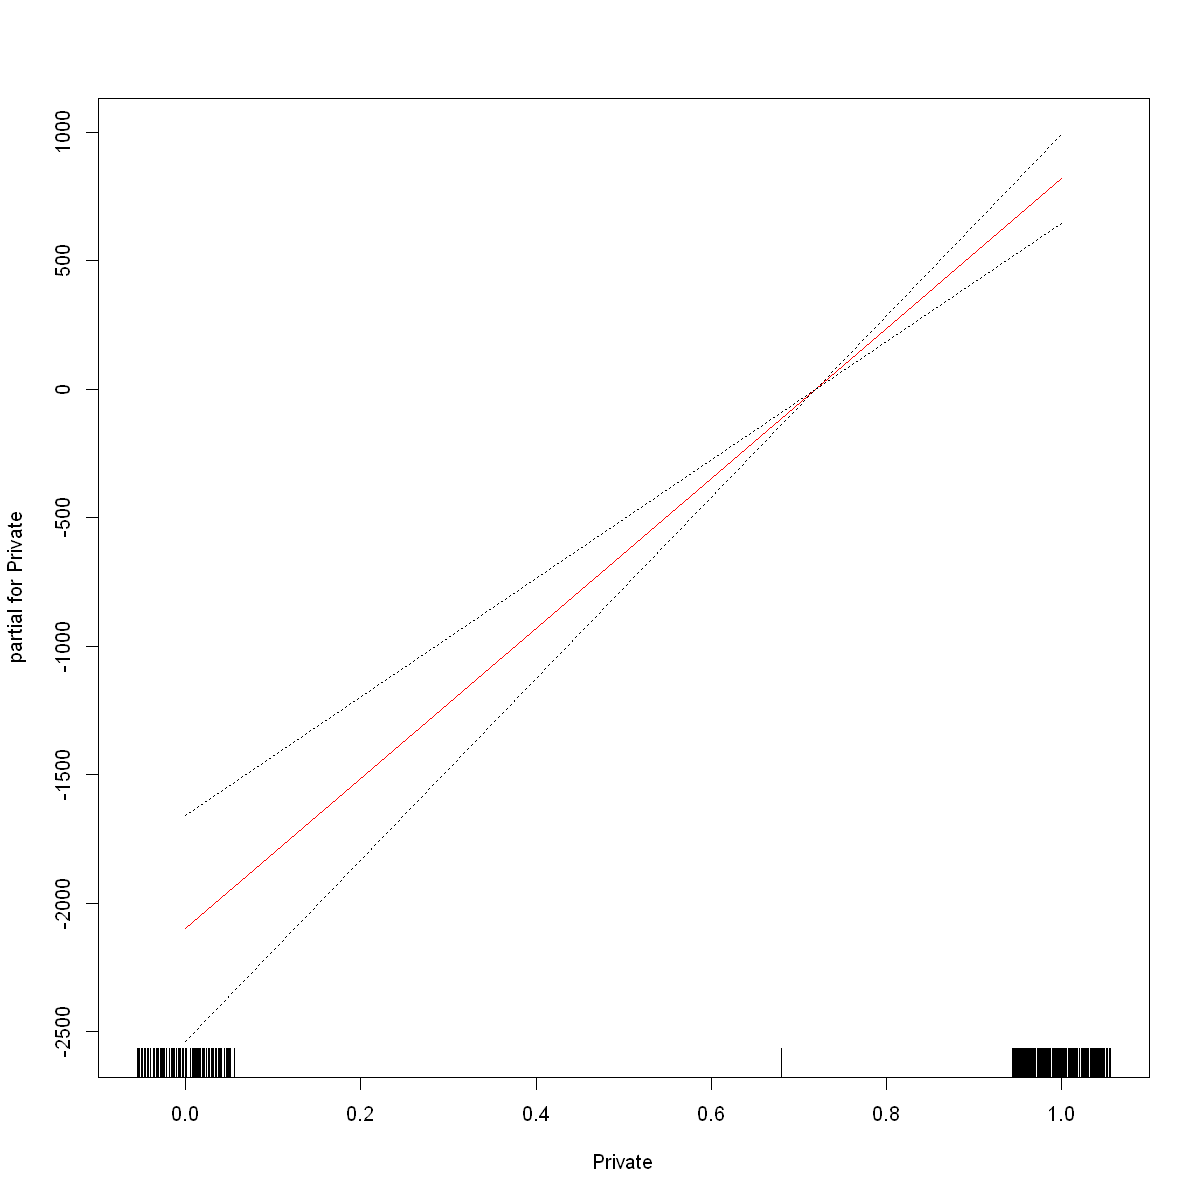

In [95]:
library(gam) 
GAM <- gam(Outstate ~ s(Accept, df=6) + s(Enroll, df=6) + s(Top25perc, df=6) +
                             s(Room.Board, df=6) + s(Personal, df=6) + s(Terminal, df=6) +
                             s(perc.alumni, df=6) + s(Expend, df=6) + s(Grad.Rate, df=6) +
                             Private,
                 data=train[, c(forward_selection, 'Outstate')])
plot(GAM, se=TRUE, col='red')

In [96]:
prediction <- predict(LR_forward, newdata=test, 10)
mean((prediction - test$Outstate)^2)

[1] 4149662

In [98]:
prediction <- predict(GAM, newdata=test)
mean((prediction - test$Outstate)^2)

[1] 4868596

#### Forward selection is better than GAM in this example